# Plant Height Geospatial Tutorial

Welcome to the plant height geospatial tutorial! This will analyze height for regions in a geojson shapefile using regional percentiles. The example data used in this tutorial comes from NDSU [BisonFly](https://github.com/filipematias23/Bison-Fly). 

If you would like to use the same example data, [the zip file from BisonFly containing the relevant RGBs and DSMs is available for download here.](https://drive.google.com/file/d/1_Uj3oaiSv31WpbGyyUCfKiKhAqQ_jPUN/view) Once you have downloaded the zip file, run the code below to add the folder to your local notebook.

In [1]:
# Optional: Add the BisonFly data to your notebook.
import zipfile as zf
files = zf.ZipFile("/Users/Your_Username/Downloads/NDSU_WheatData_UAV_2021.zip", 'r')
files.extractall('BisonFly')
files.close()

In [1]:
# Set the notebook display method.
%matplotlib widget

#Import libraries
from plantcv import plantcv as pcv
from plantcv.learn import train_kmeans
import plantcv.geospatial as geo
import os
import cv2
import napari

pcv.params.debug = "plot"

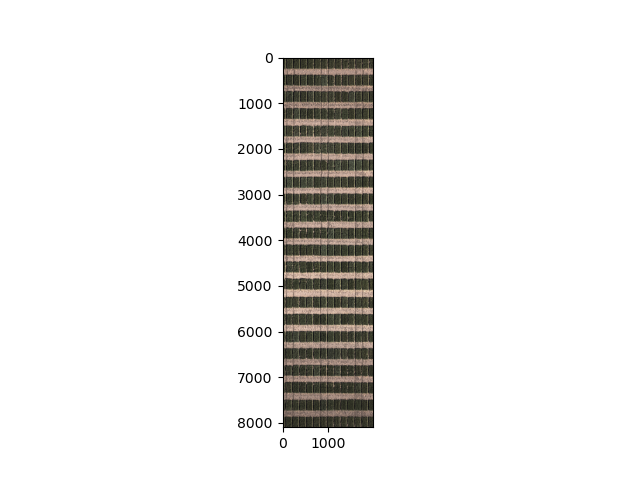

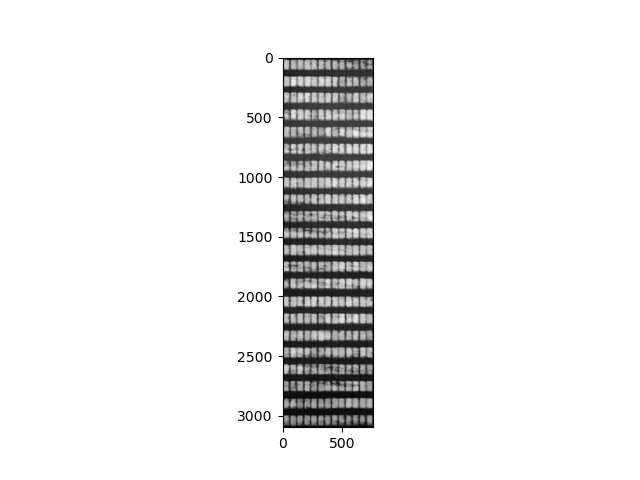

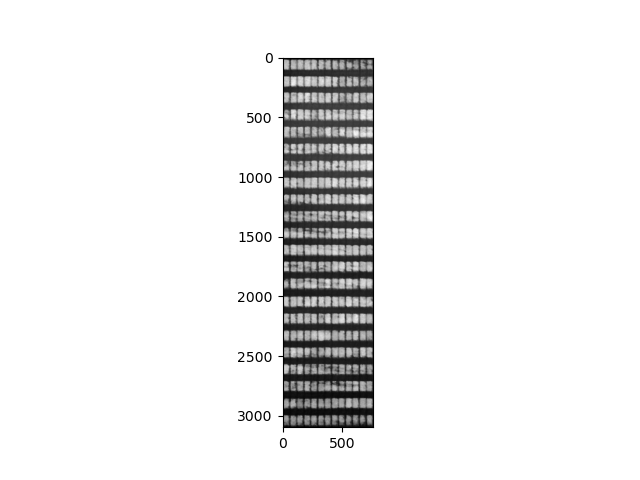

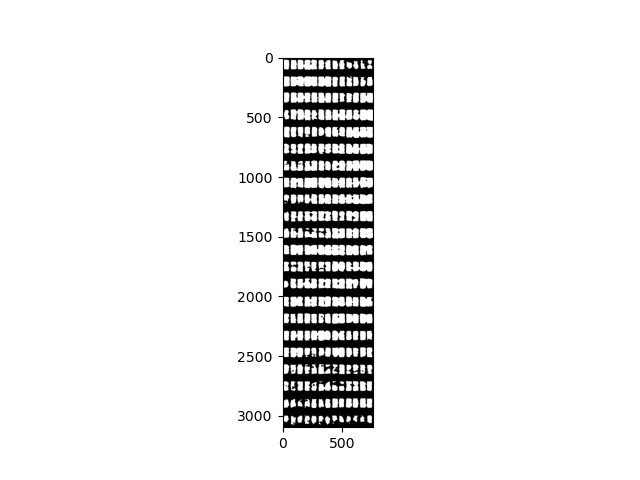

In [2]:
# First, we are going to read in the image we want to use. Make sure this is an RGB image. 'Folder' is the folder containing your RGBs and DSMs. If you used the code above to download the BisonFly zip file, replace 'folder' with 'BisonFly' and 'RGB_image' with your desired image.
geoimg = geo.read_geotif("./folder/RGB_image.tif",
                     bands="r,g,b")

# Next we are going to read in the DSM that will be used in our function.
img, _, _ = pcv.readimage("./folder/DSM_image.tif")

# We will transform the image so our functions can successfully read them in.
img = pcv.transform.rescale(gray_img = img, min_value=0, max_value=255)

# We will make a binary mask for the object.
plant_mask = pcv.threshold.binary(gray_img = img, threshold=125, object_type="light")

In [20]:
# This function opens napari, where you can create layers. Please see the images and instructions below before you run this code.
img=geoimg
viewer = napari.Viewer()
viewer.add_image(img.pseudo_rgb)

viewer.add_points()

<Points layer 'Points' at 0x31e4d8740>

Congratulations, you've opened napari! **Starting in the top left corner**, make 4 points in each corner of your field going clockwise. Don't worry about perfectly aligning the points of the rectangle, the 4 points just have to contain the whole field. 

![](https://github.com/danforthcenter/plantcv-geospatial-tutorial-plant-height/blob/172722de00246c293467ab67b09c8da58cd5b091/img/tutorial-imgs/img2.png)

In [21]:
# This code saves the '4cornerpoints' layer as a geojson. The output location is the path to the folder where you want to save the geojson.
geo.points_to_geojson(img, viewer, out_path="./output_location/4cornerpoints.geojson")

In [23]:
# Now we will do the same thing, except instead of creating 4 corner points, you will now be creating points that indicate where your plots are. Please see the images and instructions below before you run this code.
img=geoimg
viewer = napari.Viewer()
viewer.add_image(img.pseudo_rgb)

viewer.add_points()

<Points layer 'Points' at 0x32c26fa70>

Mark each of the plots. Make your points at the top left corner of each of your plots.

![](https://github.com/danforthcenter/plantcv-geospatial-tutorial-plant-height/blob/172722de00246c293467ab67b09c8da58cd5b091/img/tutorial-imgs/img3.png)

In [24]:
# This code saves the 'gridpoints' layer as a geojson.
geo.points_to_geojson(img, viewer, out_path="./output_location/gridpoints.geojson")

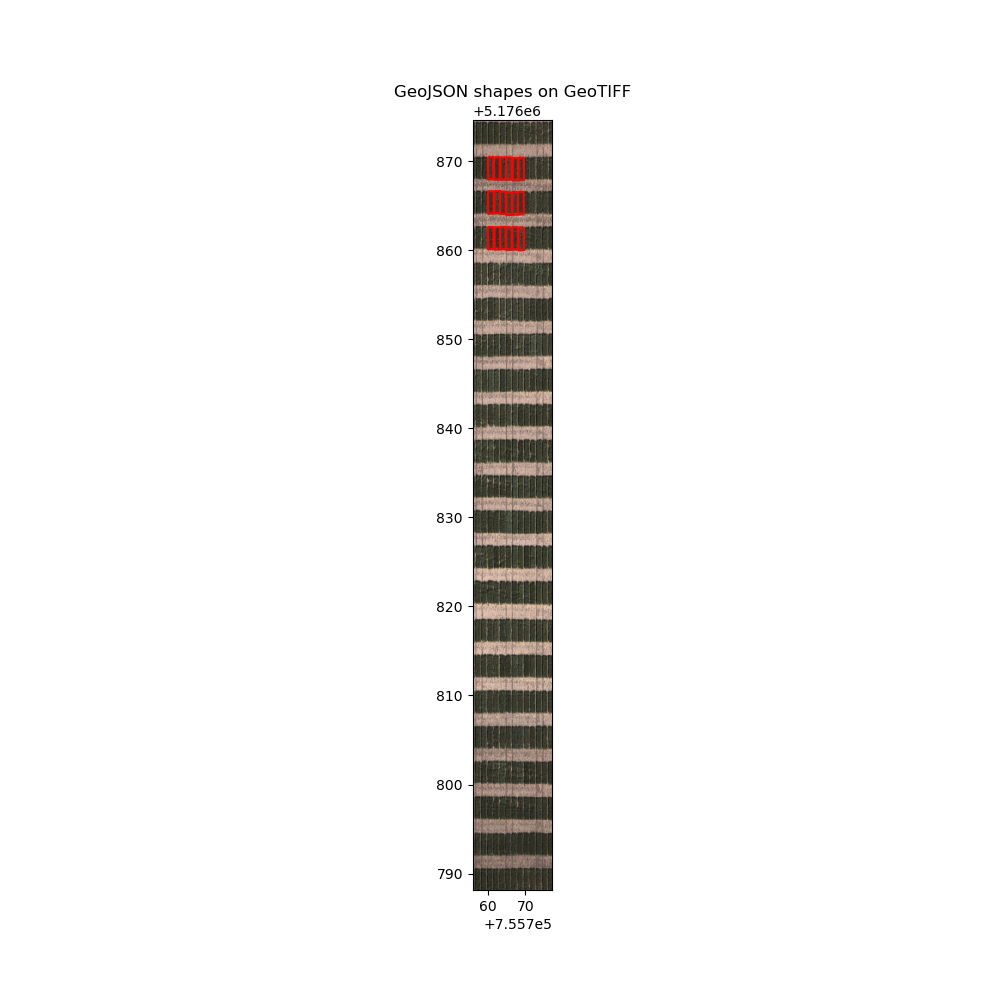

In [27]:
# The gridcells function creates grids from the designated plot points. Adjust the dimensions of the range length and row length as needed.
gridcells = geo.shapes.flexible(img=geoimg, field_corners_path="./output_location/4cornerpoints.geojson", 
                                plot_geojson_path="./output_location/gridpoints.geojson", 
                                out_path="./output_location/gridcells.geojson", num_rows=1,
                                range_length=2.5, row_length=1.5)

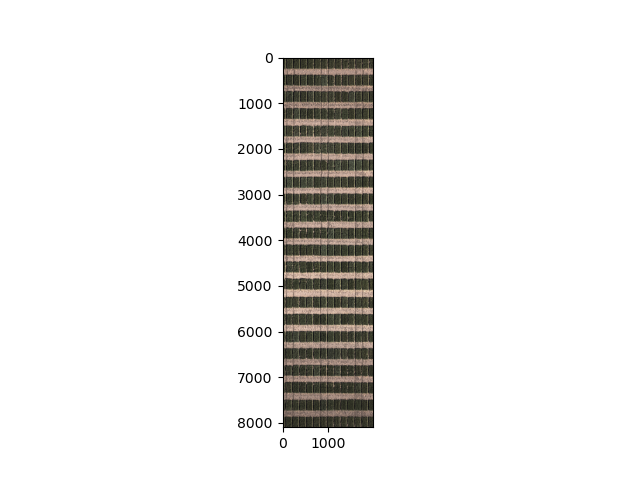

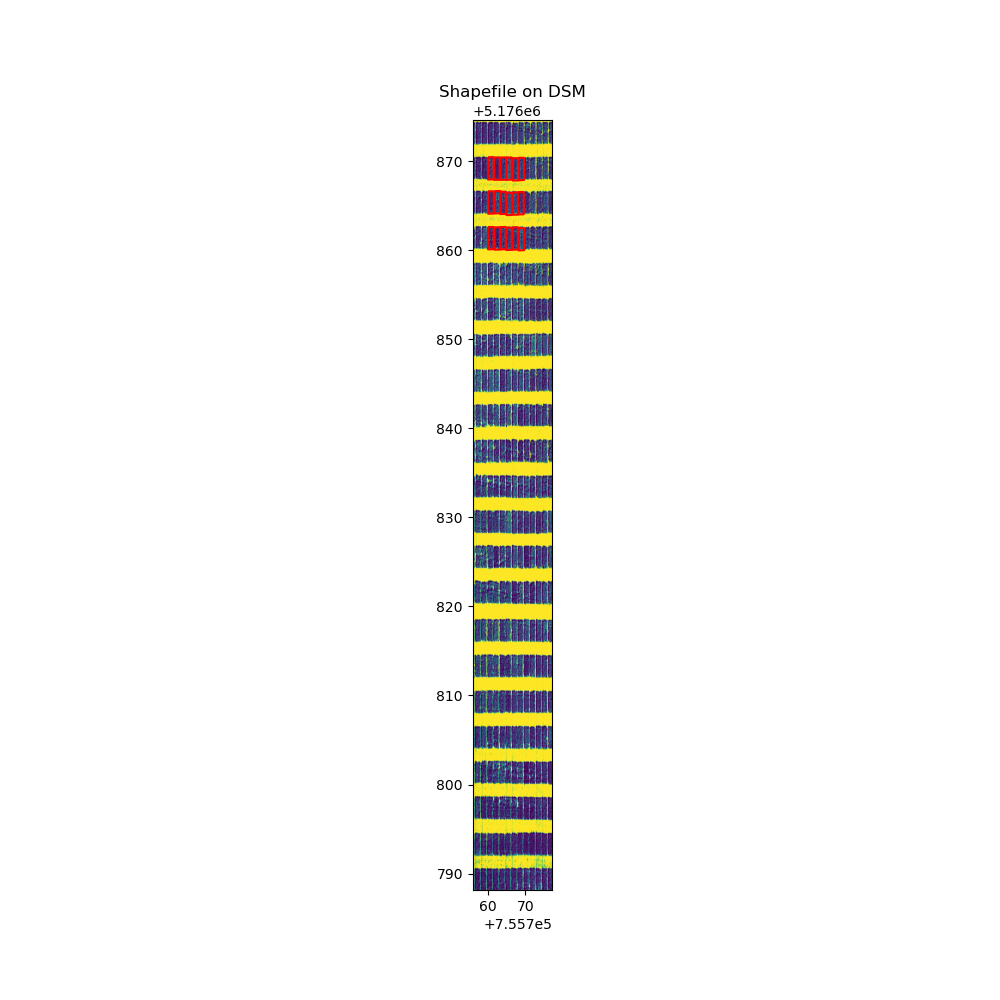

44.38299407958985


In [8]:
import plantcv.geospatial as gcv
import plantcv.plantcv as pcv

# Read geotif in.
dsm = gcv.read_geotif(filename="./folder/RGB_image.tif", bands="R,G,B")

# Analyze height for each region in the geojson.
bounds = gcv.analyze.height_percentile(dsm=dsm,
                           geojson="./output_location/gridcells.geojson",
                           lower=25,
                           upper=90,
                           label="default")

# To access individual observation values:
print(pcv.outputs.observations["default_0"]["plant_height"]["value"])

#To save the outputs as a shapefile: 
pcv.outputs.save_results(filename="./output_location/finalplots.geojson")
    
